In [5]:
#Import all the functions to execute the BO-Framework
from importlib import reload

import BO_functions.BO_framework as BO_framework; reload(BO_framework)
import BO_functions.Graph_BO_framework as Graph_BO_framework; reload(Graph_BO_framework)
import BO_functions.utils as utils; reload(utils)
import BO_functions.prior_selection_alg as prior_selection_alg; reload(prior_selection_alg)

from BO_functions.BO_framework import *
from BO_functions.Graph_BO_framework import *
from BO_functions.utils import *
from BO_functions.prior_selection_alg import *

#Import kernels:
#For binary vectors:
from BO_functions.Kernels import TanimotoKernel, DiceKernel, ForbesKernel, InnerProductKernel, MinMaxKernel, SogenfreiKernel
#For molecular descriptors (Mordred):
from BO_functions.Kernels import RBFKernel, MaternKernel, LinearKernel, RQKernel

import numpy as np
np.random.seed(42)

Found 13 invalid labels [nan nan nan nan nan nan nan nan nan nan nan nan nan] at indices [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 158]
To turn validation off, use dataloader.read_csv(..., validate=False).

Dataset: Photoswitch | Representation: ecfp_fingerprints
Total molecules: 300
Features per molecule: 2048
Label range: 297.0 to 623.0
Mean label: 388.73 | Std: 66.08


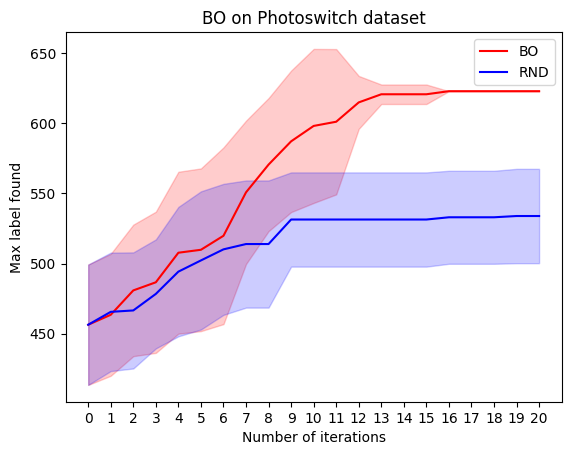

In [10]:
# ------------------------------------------
# Component Selection for molecular data
# ------------------------------------------

dataset = 'Photoswitch' # Options: {'Photoswitch', 'ESOL', 'FreeSolv', 'Lipophilicity'}
representation_type = 'ecfp_fingerprints' # Options: {'ecfp_fingerprints', 'fragments', 'ecfp_fragprints', 'mordred', 'graph'}
sample_size = 300 # Number of random samples to use. If None, uses the full dataset. --> The less samples the faster!
                    #Sample size must be grater than 100! 
# ------------------------------------------
# Load data
# ------------------------------------------

features, labels, representation_label = load_dataset(dataset, representation_type,
                                                      sample_size, seed=42)

# ------------------------------------------
# Component Selection for Bayesian Optimization
# ------------------------------------------

# Kernel function for Gaussian Process 
# Note: When using molecular descriptors such as 'Mordred', some binary kernels 
# (e.g., 'TanimotoKernel') may fail due to issues with the invertibility of the Gram matrix.
kernel = InnerProductKernel # Options: TanimotoKernel, DiceKernel, ForbesKernel, InnerProductKernel, MinMaxKernel, SogenfreiKernel, RBFKernel, MaternKernel, LinearKernel, RQKernel

# Acquisition strategy
acquisition_function = 'UCB-EI'  # Options: {'EI', 'UCB', 'PI', 'UCB-EI'}

# Smart initialization strategy (optional)
smart_selection = 'none'  # Options: {'none', 'least_sim_seq', 'select_kmeans_plusplus', 'spectralClustering_rand'}

# Initial training set size as a percentage of the full dataset
start_set_size = 0.01  # e.g., 0.01 = 1%

# Number of Bayesian Optimization iterations
bo_n_iterations = 20

# ------------------------------------------
# Run Bayesian Optimization Trials
# ------------------------------------------

data = utils.run_multiple_trials(
    n_trials=10,
    X_set=features,
    y_set=labels,
    kernel=kernel,
    acquisition_function=acquisition_function,
    smart_selection=smart_selection,
    representation=representation_label,
    start_set_size=start_set_size,
    bo_n_iteration=bo_n_iterations,
    reproducibility=True
)

# ------------------------------------------
# Plot Results
# ------------------------------------------

plot_multiple_trial_iteration(
    data,
    title_name='BO on '+ dataset +' dataset',
    x_label='Number of iterations',
    y_label='Max label found'
)
